<a href="https://colab.research.google.com/github/W5Wesley/Diabeter-Binary-Health-Indactor/blob/main/Diabeter_Binary_health_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = 'https://raw.githubusercontent.com/W5Wesley/Final_Project_dbimbing/main/diabetes_binary_health_indicators_BRFSS2015.csv'

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/W5Wesley/Final_Project_dbimbing/main/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.shape

(253680, 22)

In [ ]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
data.isnull().any().any()

False

In [ ]:
data.skew()

Diabetes_binary         2.083024
HighBP                  0.286904
HighChol                0.307075
CholCheck              -4.881271
BMI                     2.122004
Smoker                  0.228810
Stroke                  4.657340
HeartDiseaseorAttack    2.778742
PhysActivity           -1.195546
Fruits                 -0.557500
Veggies                -1.592239
HvyAlcoholConsump       3.854132
AnyHealthcare          -4.181116
NoDocbcCost             2.995290
GenHlth                 0.422867
MentHlth                2.721148
PhysHlth                2.207395
DiffWalk                1.773907
Sex                     0.240350
Age                    -0.359903
Education              -0.777255
Income                 -0.891345
dtype: float64

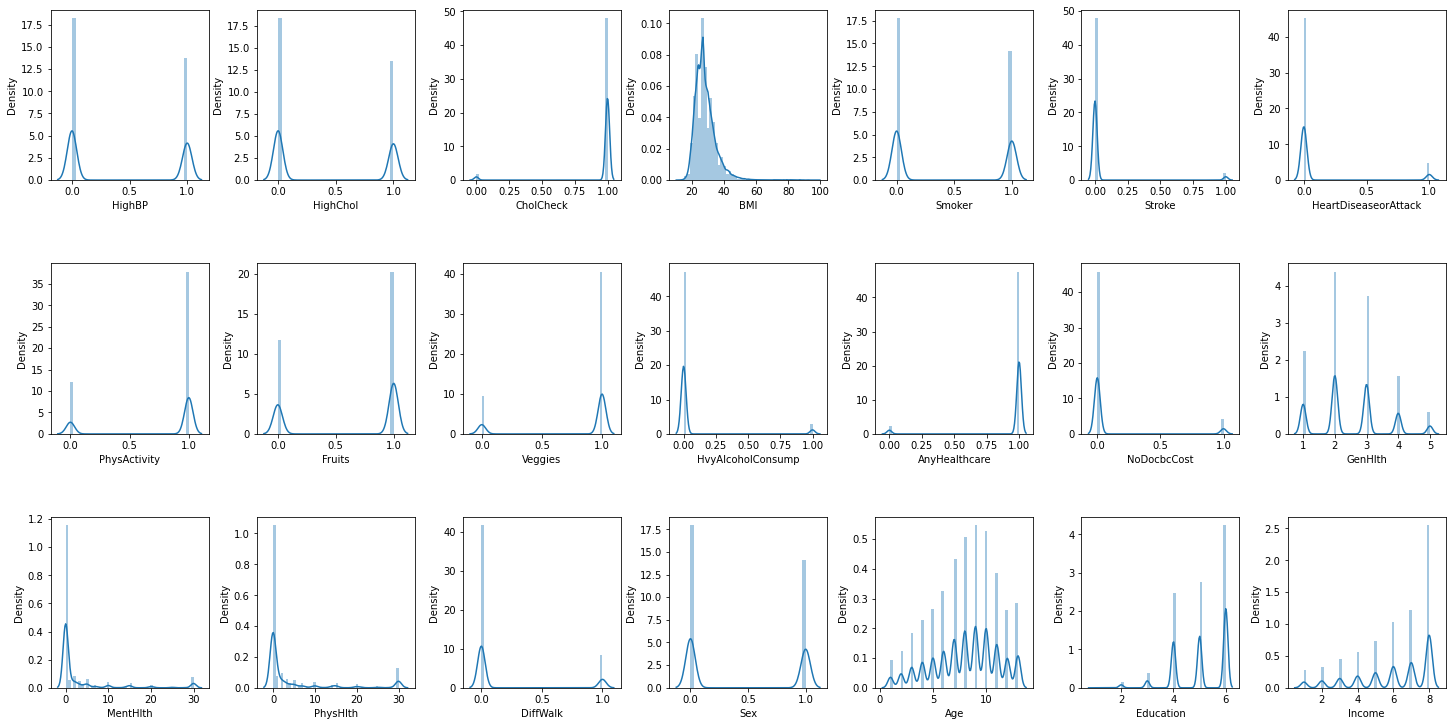

In [ ]:
#Plot Distribution
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.iloc[:,1:].items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

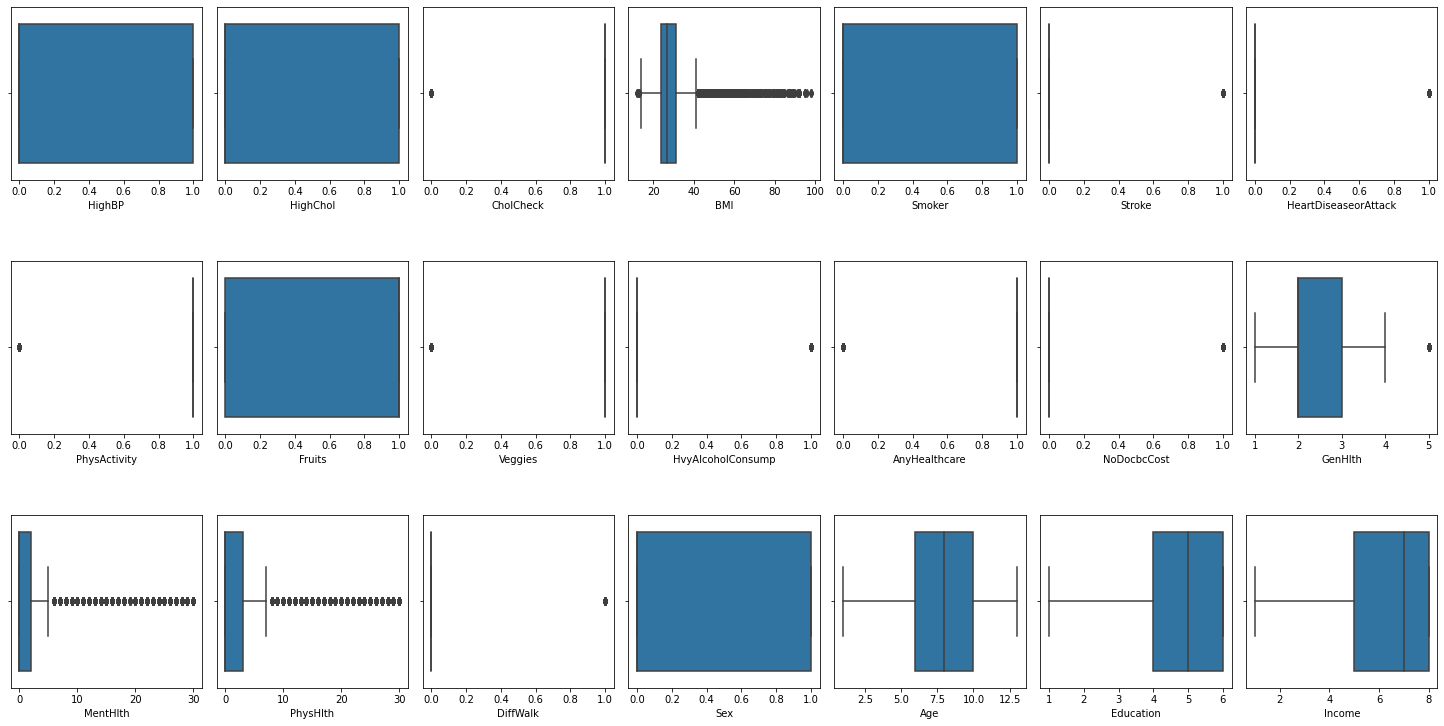

In [ ]:
#Outlier Check
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.iloc[:,1:].items():
    sns.boxplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

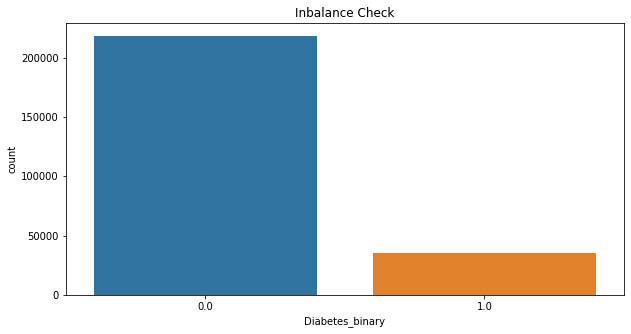

In [ ]:
#Inbalance Check
plt.figure(figsize = (10,5))
sns.countplot(data['Diabetes_binary'])
plt.title("Inbalance Check")
plt.show()

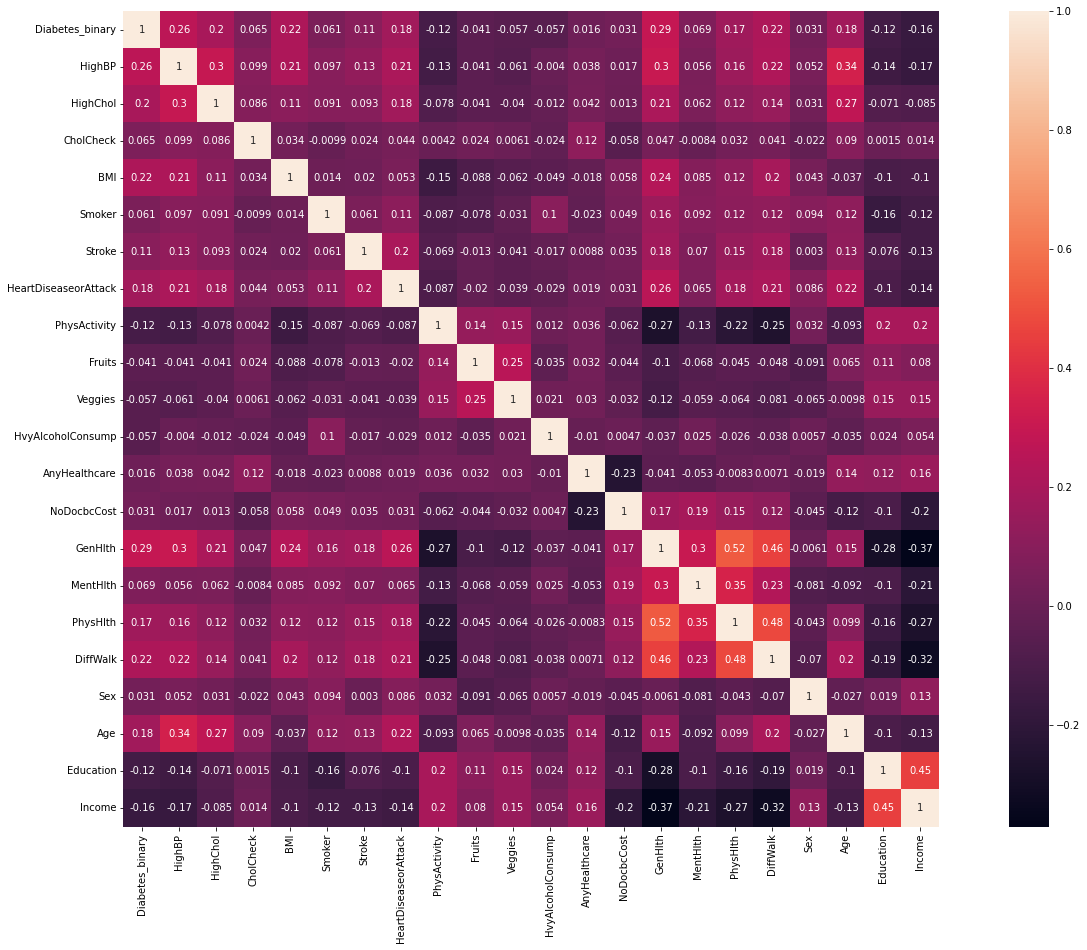

In [ ]:
plt.figure(figsize = (25,15))
sns.heatmap(data.corr(),square = True, annot=True)
plt.show()
# corr ~0.2 HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,DiffWalk,Age

#Inbalance handling

In [ ]:
X = data.iloc[:,1:]
y = data['Diabetes_binary']

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)

(202944, 21) (202944,)


In [ ]:
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape, y_train.shape)

(349326, 21) (349326,)


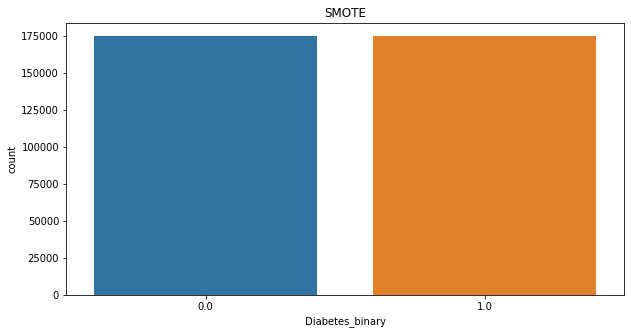

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(y_train)
plt.title("SMOTE")
plt.show()

#Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

modelRFC = RandomForestClassifier()
modelDTC = DecisionTreeClassifier()
modeNB = GaussianNB()
modeLR = LogisticRegression()

In [ ]:
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))

RFC
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43671
         1.0       0.46      0.19      0.27      7065

    accuracy                           0.86     50736
   macro avg       0.67      0.58      0.60     50736
weighted avg       0.82      0.86      0.83     50736



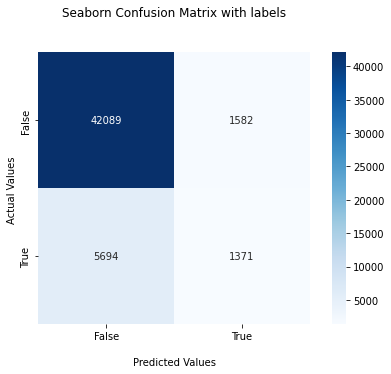

DTC
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     43671
         1.0       0.28      0.31      0.29      7065

    accuracy                           0.79     50736
   macro avg       0.58      0.59      0.59     50736
weighted avg       0.80      0.79      0.80     50736



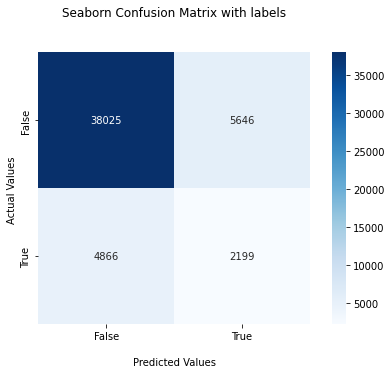

NB
              precision    recall  f1-score   support

         0.0       0.95      0.67      0.79     43671
         1.0       0.28      0.78      0.41      7065

    accuracy                           0.69     50736
   macro avg       0.61      0.72      0.60     50736
weighted avg       0.85      0.69      0.73     50736



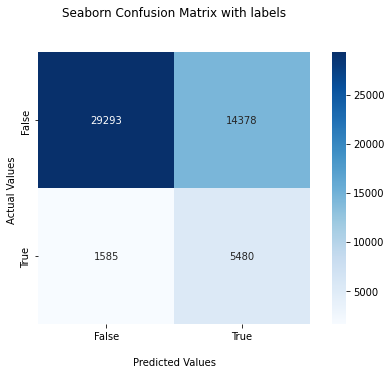

LR
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     43671
         1.0       0.31      0.76      0.44      7065

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



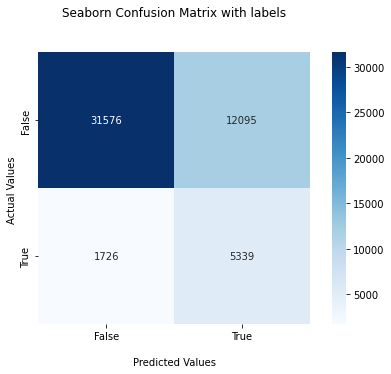

In [ ]:
for name, model in models:
  mod = model.fit(X_train, y_train)
  y_pred = mod.predict(X_test)
  print(name)
  print(classification_report(y_test, y_pred))
  cf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (8,5))
  ax = sns.heatmap(cf_matrix, fmt = ".0f", square='True',annot=True, cmap='Blues')
  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  plt.show()
  

In [ ]:
#BEST Model Recall
LR = modeLR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     43671
         1.0       0.31      0.76      0.44      7065

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



Using Matrix Recall flexibility to detect positive, its better people who is healty being recognize diabetes instead of people who have diabetes  being recoginize healty

In [ ]:
# Using Matrix Recall flexibility to detect positive, its better people who is healty being recognize diabetes instead of people who have diabetes  being recoginize healty

In [ ]:
# Recommendation : Hyperparameter Tuning to increase f1 and precision score

#UNDERSTANDING FEATURE IMPORTANCE

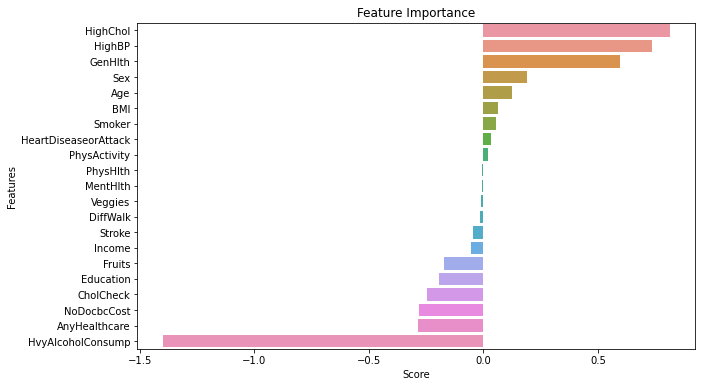

In [ ]:
#Feature Importance Coef
feature = pd.Series(LR.coef_[0], index = X_train.columns).sort_values(ascending = False)
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [ ]:
#transform data
data.Diabetes_binary[data['Diabetes_binary'] == 0] = 'No Diabetes'
data.Diabetes_binary[data['Diabetes_binary'] == 1] = 'Diabetes'

data.HighBP[data['HighBP'] == 0] = 'No High'
data.HighBP[data['HighBP'] == 1] = 'High BP'

data.HighChol[data['HighChol'] == 0] = 'No High Cholesterol'
data.HighChol[data['HighChol'] == 1] = 'High Cholesterol'

data.CholCheck[data['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data.CholCheck[data['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data.Smoker[data['Smoker'] == 0] = 'No'
data.Smoker[data['Smoker'] == 1] = 'Yes'

data.Stroke[data['Stroke'] == 0] = 'No'
data.Stroke[data['Stroke'] == 1] = 'Yes'

data.HeartDiseaseorAttack[data['HeartDiseaseorAttack'] == 0] = 'No'
data.HeartDiseaseorAttack[data['HeartDiseaseorAttack'] == 1] = 'Yes'

data.PhysActivity[data['PhysActivity'] == 0] = 'No'
data.PhysActivity[data['PhysActivity'] == 1] = 'Yes'

data.Fruits[data['Fruits'] == 0] = 'No'
data.Fruits[data['Fruits'] == 1] = 'Yes'

data.Veggies[data['Veggies'] == 0] = 'No'
data.Veggies[data['Veggies'] == 1] = 'Yes'

data.HvyAlcoholConsump[data['HvyAlcoholConsump'] == 0] = 'No'
data.HvyAlcoholConsump[data['HvyAlcoholConsump'] == 1] = 'Yes'

data.AnyHealthcare[data['AnyHealthcare'] == 0] = 'No'
data.AnyHealthcare[data['AnyHealthcare'] == 1] = 'Yes'

data.NoDocbcCost[data['NoDocbcCost'] == 0] = 'No'
data.NoDocbcCost[data['NoDocbcCost'] == 1] = 'Yes'

data.GenHlth[data['GenHlth'] == 1] = 'Excellent'
data.GenHlth[data['GenHlth'] == 2] = 'Very Good'
data.GenHlth[data['GenHlth'] == 3] = 'Good'
data.GenHlth[data['GenHlth'] == 4] = 'Fair'
data.GenHlth[data['GenHlth'] == 5] = 'Poor'

data.DiffWalk[data['DiffWalk'] == 0] = 'No'
data.DiffWalk[data['DiffWalk'] == 1] = 'Yes'

data.Sex[data['Sex'] == 0] = 'Female'
data.Sex[data['Sex'] == 1] = 'Male'

data.Education[data['Education'] == 1] = 'Never Attended School'
data.Education[data['Education'] == 2] = 'Elementary'
data.Education[data['Education'] == 3] = 'Junior High School'
data.Education[data['Education'] == 4] = 'Senior High School'
data.Education[data['Education'] == 5] = 'Undergraduate Degree'
data.Education[data['Education'] == 6] = 'Magister'

data.Income[data['Income'] == 1] = 'Less Than $10,000'
data.Income[data['Income'] == 2] = 'Less Than $10,000'
data.Income[data['Income'] == 3] = 'Less Than $10,000'
data.Income[data['Income'] == 4] = 'Less Than $10,000'
data.Income[data['Income'] == 5] = 'Less Than $35,000'
data.Income[data['Income'] == 6] = 'Less Than $35,000'
data.Income[data['Income'] == 7] = 'Less Than $35,000'
data.Income[data['Income'] == 8] = '$75,000 or More'

data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40.0,Yes,No,No,No,No,...,Yes,No,Poor,18.0,15.0,Yes,Female,9.0,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0.0,0.0,No,Female,7.0,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28.0,No,No,No,No,Yes,...,Yes,Yes,Poor,30.0,30.0,Yes,Female,9.0,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27.0,No,No,No,Yes,Yes,...,Yes,No,Very Good,0.0,0.0,No,Female,11.0,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24.0,No,No,No,Yes,Yes,...,Yes,No,Very Good,3.0,0.0,No,Female,11.0,Undergraduate Degree,"Less Than $10,000"


In [ ]:
from google.colab import files
data.to_csv("Transform_diabetes.csv")
files.download('Transform_diabetes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
BMI = data.groupby(['BMI']).size().reset_index(name='Count')

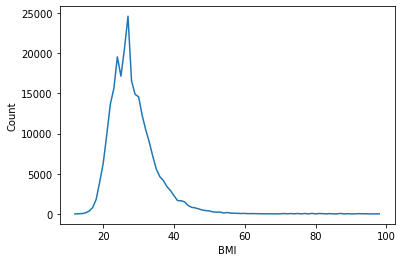

In [ ]:
sns.lineplot(data=BMI, x='BMI', y='Count')

In [ ]:
#Corr ~0.2 HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,DiffWalk,Age
#Feature > 0.5 HighChol,HighBP,GenHlth
diabetesChol = data.groupby(['Diabetes_binary', 'HighChol']).size().reset_index(name = 'Count')
print(diabetesChol)

  Diabetes_binary             HighChol   Count
0        Diabetes     High Cholesterol   23686
1        Diabetes  No High Cholesterol   11660
2     No Diabetes     High Cholesterol   83905
3     No Diabetes  No High Cholesterol  134429


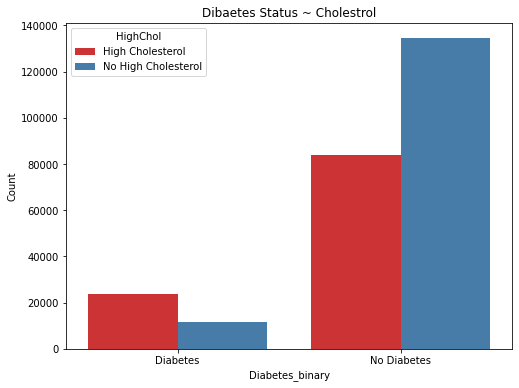

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HighChol', data = diabetesChol, palette = 'Set1')
plt.title("Dibaetes Status ~ Cholestrol")
plt.show()

In [ ]:
diabetesBP = data.groupby(['Diabetes_binary', 'HighBP']).size().reset_index(name = 'Count')
print(diabetesBP)

  Diabetes_binary   HighBP   Count
0        Diabetes  High BP   26604
1        Diabetes  No High    8742
2     No Diabetes  High BP   82225
3     No Diabetes  No High  136109


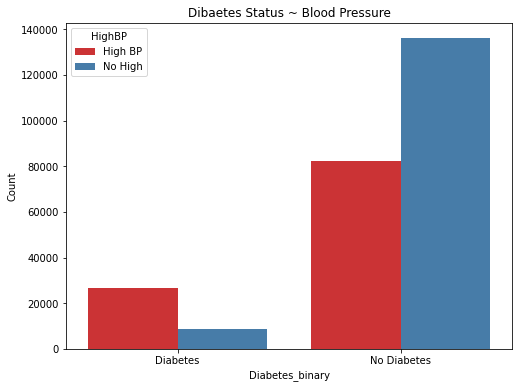

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HighBP', data = diabetesBP, palette = 'Set1')
plt.title("Dibaetes Status ~ Blood Pressure")
plt.show()

In [ ]:
diabetesGen = data.groupby(['Diabetes_binary', 'GenHlth']).size().reset_index(name = 'Count')
print(diabetesGen)

  Diabetes_binary    GenHlth  Count
0        Diabetes  Excellent   1140
1        Diabetes       Fair   9790
2        Diabetes       Good  13457
3        Diabetes       Poor   4578
4        Diabetes  Very Good   6381
5     No Diabetes  Excellent  44159
6     No Diabetes       Fair  21780
7     No Diabetes       Good  62189
8     No Diabetes       Poor   7503
9     No Diabetes  Very Good  82703


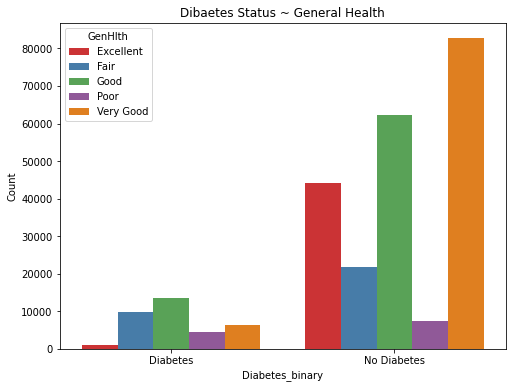

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'GenHlth', data = diabetesGen, palette = 'Set1')
plt.title("Dibaetes Status ~ General Health")
plt.show()

In [ ]:
alcho = data.groupby(['Diabetes_binary','HvyAlcoholConsump']).size().reset_index(name='Count')

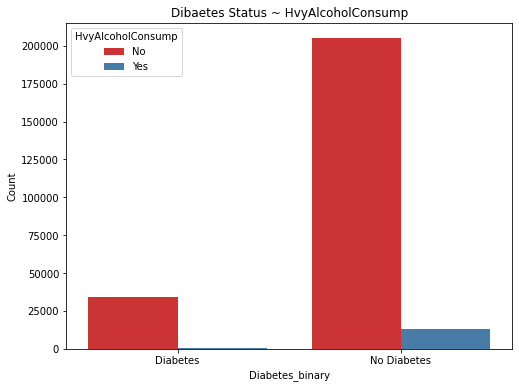

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HvyAlcoholConsump', data = alcho, palette = 'Set1')
plt.title("Dibaetes Status ~ HvyAlcoholConsump")
plt.show()

##Conclusion